## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import least_squares
from math import isclose
from ortools.linear_solver import pywraplp

## Cost Function

In [4]:
### Coeficients of the cost functions
C = [
    [-1/7 , 7799/8400, -209/1400, 61/8400],
    [-1/28, 1        , -9/56    , 31/4200],
    [-3/7 , 1        , -43/280  , 31/4200]
]

In [5]:
# Power array
Pow = np.arange(1,25,0.1)

In [6]:
# Cost function of each power plant
Cost_0 = np.array([Pow, Pow**2, Pow**3, Pow**4]).T@(np.array(C[0]).reshape(-1,1))
Cost_1 = np.array([Pow, Pow**2, Pow**3, Pow**4]).T@(np.array(C[1]).reshape(-1,1))
Cost_2 = np.array([Pow, Pow**2, Pow**3, Pow**4]).T@(np.array(C[2]).reshape(-1,1))

## Visualizing the Cost

Text(0, 0.5, 'Custo [$]')

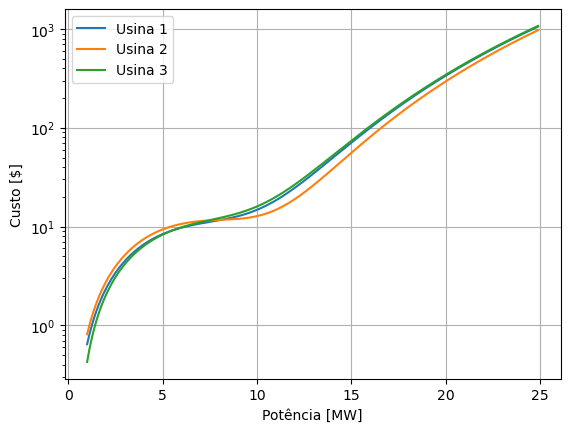

In [7]:
plt.semilogy(Pow, Cost_0, label = 'Usina 1')
plt.semilogy(Pow, Cost_1, label = 'Usina 2')
plt.semilogy(Pow, Cost_2, label = 'Usina 3')
plt.grid()
plt.legend()
plt.xlabel('Potência [MW]')
plt.ylabel('Custo [$]')

## Branch and Bound

In [9]:
lim_l = 0
lim_u = 10

disc = np.linspace(lim_l,lim_u,6)


# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('SCIP')

infinity = solver.infinity()
# x and y are integer non-negative variables.

y_1_1 = solver.IntVar(0.0, 1.0, 'y_1_1')
y_2_1 = solver.IntVar(0.0, 1.0, 'y_2_1')
y_3_1 = solver.IntVar(0.0, 1.0, 'y_3_1')
y_4_1 = solver.IntVar(0.0, 1.0, 'y_4_1')
y_5_1 = solver.IntVar(0.0, 1.0, 'y_5_1')

y_1_2 = solver.IntVar(0.0, 1.0, 'y_1_2')
y_2_2 = solver.IntVar(0.0, 1.0, 'y_2_2')
y_3_2 = solver.IntVar(0.0, 1.0, 'y_3_2')
y_4_2 = solver.IntVar(0.0, 1.0, 'y_4_2')
y_5_2 = solver.IntVar(0.0, 1.0, 'y_5_2')

y_1_3 = solver.IntVar(0.0, 1.0, 'y_1_3')
y_2_3 = solver.IntVar(0.0, 1.0, 'y_2_3')
y_3_3 = solver.IntVar(0.0, 1.0, 'y_3_3')
y_4_3 = solver.IntVar(0.0, 1.0, 'y_4_3')
y_5_3 = solver.IntVar(0.0, 1.0, 'y_5_3')

z_1_1_1 = solver.IntVar(0.0, 1.0, 'z_1_1_1')
z_1_1_2 = solver.IntVar(0.0, 1.0, 'z_1_1_2')

z_2_1_1 = solver.IntVar(0.0, 1.0, 'z_2_1_1')
z_2_1_2 = solver.IntVar(0.0, 1.0, 'z_2_1_2')

z_3_1_1 = solver.IntVar(0.0, 1.0, 'z_3_1_1')
z_3_1_2 = solver.IntVar(0.0, 1.0, 'z_3_1_2')

z_4_1_1 = solver.IntVar(0.0, 1.0, 'z_4_1_1')
z_4_1_2 = solver.IntVar(0.0, 1.0, 'z_4_1_2')

z_5_1_1 = solver.IntVar(0.0, 1.0, 'z_5_1_1')
z_5_1_2 = solver.IntVar(0.0, 1.0, 'z_5_1_2')

z_1_2_1 = solver.IntVar(0.0, 1.0, 'z_1_2_1')
z_1_2_2 = solver.IntVar(0.0, 1.0, 'z_1_2_2')

z_2_2_1 = solver.IntVar(0.0, 1.0, 'z_2_2_1')
z_2_2_2 = solver.IntVar(0.0, 1.0, 'z_2_2_2')

z_3_2_1 = solver.IntVar(0.0, 1.0, 'z_3_2_1')
z_3_2_2 = solver.IntVar(0.0, 1.0, 'z_3_2_2')

z_4_2_1 = solver.IntVar(0.0, 1.0, 'z_4_2_1')
z_4_2_2 = solver.IntVar(0.0, 1.0, 'z_4_2_2')

z_5_2_1 = solver.IntVar(0.0, 1.0, 'z_5_2_1')
z_5_2_2 = solver.IntVar(0.0, 1.0, 'z_5_2_2')


z_1_3_1 = solver.IntVar(0.0, 1.0, 'z_1_3_1')
z_1_3_2 = solver.IntVar(0.0, 1.0, 'z_1_3_2')

z_2_3_1 = solver.IntVar(0.0, 1.0, 'z_2_3_1')
z_2_3_2 = solver.IntVar(0.0, 1.0, 'z_2_3_2')

z_3_3_1 = solver.IntVar(0.0, 1.0, 'z_3_3_1')
z_3_3_2 = solver.IntVar(0.0, 1.0, 'z_3_3_2')

z_4_3_1 = solver.IntVar(0.0, 1.0, 'z_4_3_1')
z_4_3_2 = solver.IntVar(0.0, 1.0, 'z_4_3_2')

z_5_3_1 = solver.IntVar(0.0, 1.0, 'z_5_3_1')
z_5_3_2 = solver.IntVar(0.0, 1.0, 'z_5_3_2')


p_1 = solver.NumVar(lim_l, lim_u**1, 'p_1')
p_2 = solver.NumVar(lim_l, lim_u**1, 'p_2')
p_3 = solver.NumVar(lim_l, lim_u**1, 'p_3')

p_1_2 = solver.NumVar(lim_l, lim_u**2, 'p_1_2')
p_2_2 = solver.NumVar(lim_l, lim_u**2, 'p_2_2')
p_3_2 = solver.NumVar(lim_l, lim_u**2, 'p_3_2')

p_1_3 = solver.NumVar(lim_l, lim_u**3, 'p_1_3')
p_2_3 = solver.NumVar(lim_l, lim_u**3, 'p_2_3')
p_3_3 = solver.NumVar(lim_l, lim_u**3, 'p_3_3')

p_1_4 = solver.NumVar(lim_l, lim_u**4, 'p_1_4')
p_2_4 = solver.NumVar(lim_l, lim_u**4, 'p_2_4')
p_3_4 = solver.NumVar(lim_l, lim_u**4, 'p_3_4')


print('Number of variables =', solver.NumVariables())
# x + 7 * y <= 17.5.

##### y_1 = z_1 + z_2
solver.Add(y_1_1 == z_1_1_1 + z_1_1_2)
solver.Add(y_2_1 == z_2_1_1 + z_2_1_2)
solver.Add(y_3_1 == z_3_1_1 + z_3_1_2)
solver.Add(y_4_1 == z_4_1_1 + z_4_1_2)
solver.Add(y_5_1 == z_5_1_1 + z_5_1_2)


##### y_2 = z_1 + z_2
solver.Add(y_1_2 == z_1_2_1 + z_1_2_2)
solver.Add(y_2_2 == z_2_2_1 + z_2_2_2)
solver.Add(y_3_2 == z_3_2_1 + z_3_2_2)
solver.Add(y_4_2 == z_4_2_1 + z_4_2_2)
solver.Add(y_5_2 == z_5_2_1 + z_5_2_2)

##### y_3 = z_1 + z_2
solver.Add(y_1_3 == z_1_3_1 + z_1_3_2)
solver.Add(y_2_3 == z_2_3_1 + z_2_3_2)
solver.Add(y_3_3 == z_3_3_1 + z_3_3_2)
solver.Add(y_4_3 == z_4_3_1 + z_4_3_2)
solver.Add(y_5_3 == z_5_3_1 + z_5_3_2)


#### sum(y) = 1
solver.Add(y_1_1 + y_2_1 + y_3_1 + y_4_1 + y_5_1 == 1  )
solver.Add(y_1_2 + y_2_2 + y_3_2 + y_4_2 + y_5_2 == 1  )
solver.Add(y_1_3 + y_2_3 + y_3_3 + y_4_3 + y_5_3 == 1  )




############################################################
solver.Add(p_1 == ( z_1_1_1*disc[0] + z_1_1_2*disc[1] + 
                    z_2_1_1*disc[1] + z_2_1_2*disc[2] + 
                    z_3_1_1*disc[2] + z_3_1_2*disc[3] + 
                    z_4_1_1*disc[3] + z_4_1_2*disc[4] + 
                    z_5_1_1*disc[4] + z_5_1_2*disc[5] ))

solver.Add(p_2 == ( z_1_2_1*disc[0] + z_1_2_2*disc[1] + 
                    z_2_2_1*disc[1] + z_2_2_2*disc[2] + 
                    z_3_2_1*disc[2] + z_3_2_2*disc[3] + 
                    z_4_2_1*disc[3] + z_4_2_2*disc[4] + 
                    z_5_2_1*disc[4] + z_5_2_2*disc[5] ))

solver.Add(p_3 == ( z_1_3_1*disc[0] +  z_1_3_2*disc[1] + 
                    z_2_3_1*disc[1] +  z_2_3_2*disc[2] + 
                    z_3_3_1*disc[2] +  z_3_3_2*disc[3] + 
                    z_4_3_1*disc[3] +  z_4_3_2*disc[4] + 
                    z_5_3_1*disc[4] +  z_5_3_2*disc[5] ))

############################################################
solver.Add(p_1_2 == ( z_1_1_1*disc[0]**2 + z_1_1_2*disc[1]**2 + 
                    z_2_1_1*disc[1]**2 + z_2_1_2*disc[2]**2 + 
                    z_3_1_1*disc[2]**2 + z_3_1_2*disc[3]**2 + 
                    z_4_1_1*disc[3]**2 + z_4_1_2*disc[4]**2 + 
                    z_5_1_1*disc[4]**2 + z_5_1_2*disc[5]**2 ))

solver.Add(p_2_2 == ( z_1_2_1*disc[0]**2 + z_1_2_2*disc[1]**2 + 
                    z_2_2_1*disc[1]**2 + z_2_2_2*disc[2]**2 + 
                    z_3_2_1*disc[2]**2 + z_3_2_2*disc[3]**2 + 
                    z_4_2_1*disc[3]**2 + z_4_2_2*disc[4]**2 + 
                    z_5_2_1*disc[4]**2 + z_5_2_2*disc[5]**2 ))

solver.Add(p_3_2 == ( z_1_3_1*disc[0]**2 +  z_1_3_2*disc[1]**2 + 
                    z_2_3_1*disc[1]**2 +  z_2_3_2*disc[2]**2 + 
                    z_3_3_1*disc[2]**2 +  z_3_3_2*disc[3]**2 + 
                    z_4_3_1*disc[3]**2 +  z_4_3_2*disc[4]**2 + 
                    z_5_3_1*disc[4]**2 +  z_5_3_2*disc[5]**2 ))

############################################################
solver.Add(p_1_3 == ( z_1_1_1*disc[0]**3 + z_1_1_2*disc[1]**3 + 
                    z_2_1_1*disc[1]**3 + z_2_1_2*disc[2]**3 + 
                    z_3_1_1*disc[2]**3 + z_3_1_2*disc[3]**3 + 
                    z_4_1_1*disc[3]**3 + z_4_1_2*disc[4]**3 + 
                    z_5_1_1*disc[4]**3 + z_5_1_2*disc[5]**3 ))

solver.Add(p_2_3 == ( z_1_2_1*disc[0]**3 + z_1_2_2*disc[1]**3 + 
                    z_2_2_1*disc[1]**3 + z_2_2_2*disc[2]**3 + 
                    z_3_2_1*disc[2]**3 + z_3_2_2*disc[3]**3 + 
                    z_4_2_1*disc[3]**3 + z_4_2_2*disc[4]**3 + 
                    z_5_2_1*disc[4]**3 + z_5_2_2*disc[5]**3 ))

solver.Add(p_3_3 == ( z_1_3_1*disc[0]**3 +  z_1_3_2*disc[1]**3 + 
                    z_2_3_1*disc[1]**3 +  z_2_3_2*disc[2]**3 + 
                    z_3_3_1*disc[2]**3 +  z_3_3_2*disc[3]**3 + 
                    z_4_3_1*disc[3]**3 +  z_4_3_2*disc[4]**3 + 
                    z_5_3_1*disc[4]**3 +  z_5_3_2*disc[5]**3 ))

############################################################
solver.Add(p_1_4 == ( z_1_1_1*disc[0]**4 + z_1_1_2*disc[1]**4 + 
                    z_2_1_1*disc[1]**4 + z_2_1_2*disc[2]**4 + 
                    z_3_1_1*disc[2]**4 + z_3_1_2*disc[3]**4 + 
                    z_4_1_1*disc[3]**4 + z_4_1_2*disc[4]**4 + 
                    z_5_1_1*disc[4]**4 + z_5_1_2*disc[5]**4 ))

solver.Add(p_2_4 == ( z_1_2_1*disc[0]**4 + z_1_2_2*disc[1]**4 + 
                    z_2_2_1*disc[1]**4 + z_2_2_2*disc[2]**4 + 
                    z_3_2_1*disc[2]**4 + z_3_2_2*disc[3]**4 + 
                    z_4_2_1*disc[3]**4 + z_4_2_2*disc[4]**4 + 
                    z_5_2_1*disc[4]**4 + z_5_2_2*disc[5]**4 ))

solver.Add(p_3_4 == ( z_1_3_1*disc[0]**4 +  z_1_3_2*disc[1]**4 + 
                    z_2_3_1*disc[1]**4 +  z_2_3_2*disc[2]**4 + 
                    z_3_3_1*disc[2]**4 +  z_3_3_2*disc[3]**4 + 
                    z_4_3_1*disc[3]**4 +  z_4_3_2*disc[4]**4 + 
                    z_5_3_1*disc[4]**4 +  z_5_3_2*disc[5]**4 ))

solver.Add(p_1 + p_2 + p_3 >= 25)


print('Number of constraints =', solver.NumConstraints())

# Maximize x + 10 * y.
#solver.Minimize(p_1 + p_2 + p_3)

solver.Minimize( (C[0][0]*p_1 + C[0][1]*p_1_2 + C[0][2]*p_1_3 + C[0][3]*p_1_4) +
                    (C[1][0]*p_2 + C[1][1]*p_2_2 + C[1][2]*p_2_3 + C[1][3]*p_2_4) +
                    (C[2][0]*p_3 + C[2][1]*p_3_2 + C[2][2]*p_3_3 + C[2][3]*p_3_4))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    #print('x =', x.solution_value())
    #print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

print(p_1.solution_value())
print(p_2.solution_value())
print(p_3.solution_value())





print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


Number of variables = 57
Number of constraints = 31
Solution:
Objective value = 36.50190476190474
8.0
10.0
8.0

Advanced usage:
Problem solved in 92.000000 milliseconds
Problem solved in 24 iterations
Problem solved in 1 branch-and-bound nodes


In [10]:
lim_l = p_1.solution_value()*0.8
lim_u = p_1.solution_value()*1.2

lim_l_1 = p_2.solution_value()*0.8
lim_u_1 = p_2.solution_value()*1.2

disc = np.linspace(p_1.solution_value()*0.8,p_1.solution_value()*1.2,11)
disc_1 = np.linspace(p_2.solution_value()*0.8,p_2.solution_value()*1.2,11)

# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('SCIP')

infinity = solver.infinity()
# x and y are integer non-negative variables.

y_1_1 = solver.IntVar(0.0, 1.0, 'y_1_1')
y_2_1 = solver.IntVar(0.0, 1.0, 'y_2_1')
y_3_1 = solver.IntVar(0.0, 1.0, 'y_3_1')
y_4_1 = solver.IntVar(0.0, 1.0, 'y_4_1')
y_5_1 = solver.IntVar(0.0, 1.0, 'y_5_1')
y_6_1 = solver.IntVar(0.0, 1.0, 'y_6_1')
y_7_1 = solver.IntVar(0.0, 1.0, 'y_7_1')
y_8_1 = solver.IntVar(0.0, 1.0, 'y_8_1')
y_9_1 = solver.IntVar(0.0, 1.0, 'y_9_1')
y_10_1 = solver.IntVar(0.0, 1.0, 'y_10_1')

y_1_2 = solver.IntVar(0.0, 1.0, 'y_1_2')
y_2_2 = solver.IntVar(0.0, 1.0, 'y_2_2')
y_3_2 = solver.IntVar(0.0, 1.0, 'y_3_2')
y_4_2 = solver.IntVar(0.0, 1.0, 'y_4_2')
y_5_2 = solver.IntVar(0.0, 1.0, 'y_5_2')
y_6_2 = solver.IntVar(0.0, 1.0, 'y_6_2')
y_7_2 = solver.IntVar(0.0, 1.0, 'y_7_2')
y_8_2 = solver.IntVar(0.0, 1.0, 'y_8_2')
y_9_2 = solver.IntVar(0.0, 1.0, 'y_9_2')
y_10_2 = solver.IntVar(0.0, 1.0, 'y_10_2')

y_1_3 = solver.IntVar(0.0, 1.0, 'y_1_3')
y_2_3 = solver.IntVar(0.0, 1.0, 'y_2_3')
y_3_3 = solver.IntVar(0.0, 1.0, 'y_3_3')
y_4_3 = solver.IntVar(0.0, 1.0, 'y_4_3')
y_5_3 = solver.IntVar(0.0, 1.0, 'y_5_3')
y_6_3 = solver.IntVar(0.0, 1.0, 'y_6_3')
y_7_3 = solver.IntVar(0.0, 1.0, 'y_7_3')
y_8_3 = solver.IntVar(0.0, 1.0, 'y_8_3')
y_9_3 = solver.IntVar(0.0, 1.0, 'y_9_3')
y_10_3 = solver.IntVar(0.0, 1.0, 'y_10_3')

z_1_1_1 = solver.IntVar(0.0, 1.0, 'z_1_1_1')
z_1_1_2 = solver.IntVar(0.0, 1.0, 'z_1_1_2')

z_2_1_1 = solver.IntVar(0.0, 1.0, 'z_2_1_1')
z_2_1_2 = solver.IntVar(0.0, 1.0, 'z_2_1_2')

z_3_1_1 = solver.IntVar(0.0, 1.0, 'z_3_1_1')
z_3_1_2 = solver.IntVar(0.0, 1.0, 'z_3_1_2')

z_4_1_1 = solver.IntVar(0.0, 1.0, 'z_4_1_1')
z_4_1_2 = solver.IntVar(0.0, 1.0, 'z_4_1_2')

z_5_1_1 = solver.IntVar(0.0, 1.0, 'z_5_1_1')
z_5_1_2 = solver.IntVar(0.0, 1.0, 'z_5_1_2')

z_6_1_1 = solver.IntVar(0.0, 1.0, 'z_6_1_1')
z_6_1_2 = solver.IntVar(0.0, 1.0, 'z_6_1_2')

z_7_1_1 = solver.IntVar(0.0, 1.0, 'z_7_1_1')
z_7_1_2 = solver.IntVar(0.0, 1.0, 'z_7_1_2')

z_8_1_1 = solver.IntVar(0.0, 1.0, 'z_8_1_1')
z_8_1_2 = solver.IntVar(0.0, 1.0, 'z_8_1_2')

z_9_1_1 = solver.IntVar(0.0, 1.0, 'z_9_1_1')
z_9_1_2 = solver.IntVar(0.0, 1.0, 'z_9_1_2')

z_10_1_1 = solver.IntVar(0.0, 1.0, 'z_10_1_1')
z_10_1_2 = solver.IntVar(0.0, 1.0, 'z_10_1_2')

z_1_2_1 = solver.IntVar(0.0, 1.0, 'z_1_2_1')
z_1_2_2 = solver.IntVar(0.0, 1.0, 'z_1_2_2')

z_2_2_1 = solver.IntVar(0.0, 1.0, 'z_2_2_1')
z_2_2_2 = solver.IntVar(0.0, 1.0, 'z_2_2_2')

z_3_2_1 = solver.IntVar(0.0, 1.0, 'z_3_2_1')
z_3_2_2 = solver.IntVar(0.0, 1.0, 'z_3_2_2')

z_4_2_1 = solver.IntVar(0.0, 1.0, 'z_4_2_1')
z_4_2_2 = solver.IntVar(0.0, 1.0, 'z_4_2_2')

z_5_2_1 = solver.IntVar(0.0, 1.0, 'z_5_2_1')
z_5_2_2 = solver.IntVar(0.0, 1.0, 'z_5_2_2')

z_6_2_1 = solver.IntVar(0.0, 1.0, 'z_6_2_1')
z_6_2_2 = solver.IntVar(0.0, 1.0, 'z_6_2_2')

z_7_2_1 = solver.IntVar(0.0, 1.0, 'z_7_2_1')
z_7_2_2 = solver.IntVar(0.0, 1.0, 'z_7_2_2')

z_8_2_1 = solver.IntVar(0.0, 1.0, 'z_8_2_1')
z_8_2_2 = solver.IntVar(0.0, 1.0, 'z_8_2_2')

z_9_2_1 = solver.IntVar(0.0, 1.0, 'z_9_2_1')
z_9_2_2 = solver.IntVar(0.0, 1.0, 'z_9_2_2')

z_10_2_1 = solver.IntVar(0.0, 1.0, 'z_10_2_1')
z_10_2_2 = solver.IntVar(0.0, 1.0, 'z_10_2_2')


z_1_3_1 = solver.IntVar(0.0, 1.0, 'z_1_3_1')
z_1_3_2 = solver.IntVar(0.0, 1.0, 'z_1_3_2')

z_2_3_1 = solver.IntVar(0.0, 1.0, 'z_2_3_1')
z_2_3_2 = solver.IntVar(0.0, 1.0, 'z_2_3_2')

z_3_3_1 = solver.IntVar(0.0, 1.0, 'z_3_3_1')
z_3_3_2 = solver.IntVar(0.0, 1.0, 'z_3_3_2')

z_4_3_1 = solver.IntVar(0.0, 1.0, 'z_4_3_1')
z_4_3_2 = solver.IntVar(0.0, 1.0, 'z_4_3_2')

z_5_3_1 = solver.IntVar(0.0, 1.0, 'z_5_3_1')
z_5_3_2 = solver.IntVar(0.0, 1.0, 'z_5_3_2')

z_6_3_1 = solver.IntVar(0.0, 1.0, 'z_6_3_1')
z_6_3_2 = solver.IntVar(0.0, 1.0, 'z_6_3_2')

z_7_3_1 = solver.IntVar(0.0, 1.0, 'z_7_3_1')
z_7_3_2 = solver.IntVar(0.0, 1.0, 'z_7_3_2')

z_8_3_1 = solver.IntVar(0.0, 1.0, 'z_8_3_1')
z_8_3_2 = solver.IntVar(0.0, 1.0, 'z_8_3_2')

z_9_3_1 = solver.IntVar(0.0, 1.0, 'z_9_3_1')
z_9_3_2 = solver.IntVar(0.0, 1.0, 'z_9_3_2')

z_10_3_1 = solver.IntVar(0.0, 1.0, 'z_10_3_1')
z_10_3_2 = solver.IntVar(0.0, 1.0, 'z_10_3_2')


p_1 = solver.NumVar(lim_l, lim_u**1, 'p_1')
p_2 = solver.NumVar(lim_l_1, lim_u_1**1, 'p_2')
p_3 = solver.NumVar(lim_l, lim_u**1, 'p_3')

p_1_2 = solver.NumVar(lim_l, lim_u**2, 'p_1_2')
p_2_2 = solver.NumVar(lim_l_1, lim_u_1**2, 'p_2_2')
p_3_2 = solver.NumVar(lim_l, lim_u**2, 'p_3_2')

p_1_3 = solver.NumVar(lim_l, lim_u**3, 'p_1_3')
p_2_3 = solver.NumVar(lim_l_1, lim_u_1**3, 'p_2_3')
p_3_3 = solver.NumVar(lim_l, lim_u**3, 'p_3_3')

p_1_4 = solver.NumVar(lim_l, lim_u**4, 'p_1_4')
p_2_4 = solver.NumVar(lim_l_1, lim_u_1**4, 'p_2_4')
p_3_4 = solver.NumVar(lim_l, lim_u_1**4, 'p_3_4')


print('Number of variables =', solver.NumVariables())
# x + 7 * y <= 17.5.

##### y_1 = z_1 + z_2
solver.Add(y_1_1 == z_1_1_1 + z_1_1_2)
solver.Add(y_2_1 == z_2_1_1 + z_2_1_2)
solver.Add(y_3_1 == z_3_1_1 + z_3_1_2)
solver.Add(y_4_1 == z_4_1_1 + z_4_1_2)
solver.Add(y_5_1 == z_5_1_1 + z_5_1_2)
solver.Add(y_6_1 == z_6_1_1 + z_6_1_2)
solver.Add(y_7_1 == z_7_1_1 + z_7_1_2)
solver.Add(y_8_1 == z_8_1_1 + z_8_1_2)
solver.Add(y_9_1 == z_9_1_1 + z_9_1_2)
solver.Add(y_10_1 == z_10_1_1 + z_10_1_2)


##### y_2 = z_1 + z_2
solver.Add(y_1_2 == z_1_2_1 + z_1_2_2)
solver.Add(y_2_2 == z_2_2_1 + z_2_2_2)
solver.Add(y_3_2 == z_3_2_1 + z_3_2_2)
solver.Add(y_4_2 == z_4_2_1 + z_4_2_2)
solver.Add(y_5_2 == z_5_2_1 + z_5_2_2)
solver.Add(y_6_2 == z_6_2_1 + z_6_2_2)
solver.Add(y_7_2 == z_7_2_1 + z_7_2_2)
solver.Add(y_8_2 == z_8_2_1 + z_8_2_2)
solver.Add(y_9_2 == z_9_2_1 + z_9_2_2)
solver.Add(y_10_2 == z_10_2_1 + z_10_2_2)

##### y_3 = z_1 + z_2
solver.Add(y_1_3 == z_1_3_1 + z_1_3_2)
solver.Add(y_2_3 == z_2_3_1 + z_2_3_2)
solver.Add(y_3_3 == z_3_3_1 + z_3_3_2)
solver.Add(y_4_3 == z_4_3_1 + z_4_3_2)
solver.Add(y_5_3 == z_5_3_1 + z_5_3_2)
solver.Add(y_6_3 == z_6_3_1 + z_6_3_2)
solver.Add(y_7_3 == z_7_3_1 + z_7_3_2)
solver.Add(y_8_3 == z_8_3_1 + z_8_3_2)
solver.Add(y_9_3 == z_9_3_1 + z_9_3_2)
solver.Add(y_10_3 == z_10_3_1 + z_10_3_2)


#### sum(y) = 1
solver.Add(y_1_1 + y_2_1 + y_3_1 + y_4_1 + y_5_1+ y_6_1+ y_7_1+ y_8_1+ y_9_1+ y_10_1 == 1  )
solver.Add(y_1_2 + y_2_2 + y_3_2 + y_4_2 + y_5_2+ y_6_2+ y_7_2+ y_8_2+ y_9_2+ y_10_2 == 1  )
solver.Add(y_1_3 + y_2_3 + y_3_3 + y_4_3 + y_5_3+ y_6_3+ y_7_3+ y_8_3+ y_9_3+ y_10_3 == 1  )




############################################################
solver.Add(p_1 == ( z_1_1_1*disc[0] + z_1_1_2*disc[1] + 
                    z_2_1_1*disc[1] + z_2_1_2*disc[2] + 
                    z_3_1_1*disc[2] + z_3_1_2*disc[3] + 
                    z_4_1_1*disc[3] + z_4_1_2*disc[4] + 
                    z_5_1_1*disc[4] + z_5_1_2*disc[5] +
                    z_6_1_1*disc[5] + z_6_1_2*disc[6] +
                    z_7_1_1*disc[6] + z_7_1_2*disc[7] +
                    z_8_1_1*disc[7] + z_8_1_2*disc[8] +
                    z_9_1_1*disc[8] + z_9_1_2*disc[9] +
                    z_10_1_1*disc[9] + z_10_1_2*disc[10]
                    ))

solver.Add(p_2 == ( z_1_2_1*disc_1[0] + z_1_2_2*disc_1[1] + 
                    z_2_2_1*disc_1[1] + z_2_2_2*disc_1[2] + 
                    z_3_2_1*disc_1[2] + z_3_2_2*disc[3] + 
                    z_4_2_1*disc_1[3] + z_4_2_2*disc[4] + 
                    z_5_2_1*disc_1[4] + z_5_2_2*disc[5] +
                    z_6_2_1*disc_1[5] + z_6_2_2*disc[6] +
                    z_7_2_1*disc_1[6] + z_7_2_2*disc[7] +
                    z_8_2_1*disc_1[7] + z_8_2_2*disc[8] +
                    z_9_2_1*disc_1[8] + z_9_2_2*disc[9] +
                    z_10_2_1*disc_1[9] + z_10_2_2*disc[10]

                    ))

solver.Add(p_3 == ( z_1_3_1*disc[0] +  z_1_3_2*disc[1] + 
                    z_2_3_1*disc[1] +  z_2_3_2*disc[2] + 
                    z_3_3_1*disc[2] +  z_3_3_2*disc[3] + 
                    z_4_3_1*disc[3] +  z_4_3_2*disc[4] + 
                    z_5_3_1*disc[4] +  z_5_3_2*disc[5] +
                    z_6_3_1*disc[5] +  z_6_3_2*disc[6] +
                    z_7_3_1*disc[6] +  z_7_3_2*disc[7] +
                    z_8_3_1*disc[7] +  z_8_3_2*disc[8] +
                    z_9_3_1*disc[8] +  z_9_3_2*disc[9] +
                    z_10_3_1*disc[9] +  z_10_3_2*disc[10] 
                    ))

############################################################
solver.Add(p_1_2 == ( z_1_1_1*disc[0]**2 + z_1_1_2*disc[1]**2 + 
                    z_2_1_1*disc[1]**2 + z_2_1_2*disc[2]**2 + 
                    z_3_1_1*disc[2]**2 + z_3_1_2*disc[3]**2 + 
                    z_4_1_1*disc[3]**2 + z_4_1_2*disc[4]**2 + 
                    z_5_1_1*disc[4]**2 + z_5_1_2*disc[5]**2 +
                    z_6_1_1*disc[5]**2 + z_6_1_2*disc[6]**2 +
                    z_7_1_1*disc[6]**2 + z_7_1_2*disc[7]**2 +
                    z_8_1_1*disc[7]**2 + z_8_1_2*disc[8]**2 +
                    z_9_1_1*disc[8]**2 + z_9_1_2*disc[9]**2 +
                    z_10_1_1*disc[9]**2 + z_10_1_2*disc[10]**2
                    ))

solver.Add(p_2_2 == ( z_1_2_1*disc_1[0]**2 + z_1_2_2*disc_1[1]**2 + 
                    z_2_2_1*disc_1[1]**2 + z_2_2_2*disc_1[2]**2 + 
                    z_3_2_1*disc_1[2]**2 + z_3_2_2*disc[3]**2 + 
                    z_4_2_1*disc_1[3]**2 + z_4_2_2*disc[4]**2 + 
                    z_5_2_1*disc_1[4]**2 + z_5_2_2*disc[5]**2 +
                    z_6_2_1*disc_1[5]**2 + z_6_2_2*disc[6]**2 +
                    z_7_2_1*disc_1[6]**2 + z_7_2_2*disc[7]**2 +
                    z_8_2_1*disc_1[7]**2 + z_8_2_2*disc[8]**2 +
                    z_9_2_1*disc_1[8]**2 + z_9_2_2*disc[9]**2 +
                    z_10_2_1*disc_1[9]**2 + z_10_2_2*disc[10]**2

                    ))

solver.Add(p_3_2 == ( z_1_3_1*disc[0]**2 +  z_1_3_2*disc[1]**2 + 
                    z_2_3_1*disc[1]**2 +  z_2_3_2*disc[2]**2 + 
                    z_3_3_1*disc[2]**2 +  z_3_3_2*disc[3]**2 + 
                    z_4_3_1*disc[3]**2 +  z_4_3_2*disc[4]**2+ 
                    z_5_3_1*disc[4]**2 +  z_5_3_2*disc[5]**2 +
                    z_6_3_1*disc[5]**2 +  z_6_3_2*disc[6]**2 +
                    z_7_3_1*disc[6]**2 +  z_7_3_2*disc[7]**2 +
                    z_8_3_1*disc[7]**2 +  z_8_3_2*disc[8]**2 +
                    z_9_3_1*disc[8]**2 +  z_9_3_2*disc[9]**2 +
                    z_10_3_1*disc[9]**2 +  z_10_3_2*disc[10]**2 
                    ))

############################################################
solver.Add(p_1_3 == ( z_1_1_1*disc[0]**3 + z_1_1_2*disc[1]**3 + 
                    z_2_1_1*disc[1]**3 + z_2_1_2*disc[2]**3 + 
                    z_3_1_1*disc[2]**3 + z_3_1_2*disc[3]**3 + 
                    z_4_1_1*disc[3]**3 + z_4_1_2*disc[4]**3 + 
                    z_5_1_1*disc[4]**3 + z_5_1_2*disc[5]**3 +
                    z_6_1_1*disc[5]**3 + z_6_1_2*disc[6]**3 +
                    z_7_1_1*disc[6]**3 + z_7_1_2*disc[7]**3 +
                    z_8_1_1*disc[7]**3 + z_8_1_2*disc[8]**3 +
                    z_9_1_1*disc[8]**3 + z_9_1_2*disc[9]**3 +
                    z_10_1_1*disc[9]**3 + z_10_1_2*disc[10]**3
                    ))

solver.Add(p_2_3 == ( z_1_2_1*disc_1[0]**3 + z_1_2_2*disc_1[1]**3 + 
                    z_2_2_1*disc_1[1]**3 + z_2_2_2*disc_1[2]**3 + 
                    z_3_2_1*disc_1[2]**3 + z_3_2_2*disc[3]**3 + 
                    z_4_2_1*disc_1[3]**3 + z_4_2_2*disc[4]**3 + 
                    z_5_2_1*disc_1[4]**3 + z_5_2_2*disc[5]**3 +
                    z_6_2_1*disc_1[5]**3 + z_6_2_2*disc[6]**3 +
                    z_7_2_1*disc_1[6]**3 + z_7_2_2*disc[7]**3 +
                    z_8_2_1*disc_1[7]**3 + z_8_2_2*disc[8]**3 +
                    z_9_2_1*disc_1[8]**3 + z_9_2_2*disc[9]**3 +
                    z_10_2_1*disc_1[9]**3 + z_10_2_2*disc[10]**3

                    ))

solver.Add(p_3_3 == ( z_1_3_1*disc[0]**3 +  z_1_3_2*disc[1]**3 + 
                    z_2_3_1*disc[1]**3 +  z_2_3_2*disc[2]**3 + 
                    z_3_3_1*disc[2]**3 +  z_3_3_2*disc[3]**3 + 
                    z_4_3_1*disc[3]**3 +  z_4_3_2*disc[4]**3 + 
                    z_5_3_1*disc[4]**3 +  z_5_3_2*disc[5]**3 +
                    z_6_3_1*disc[5]**3 +  z_6_3_2*disc[6]**3 +
                    z_7_3_1*disc[6]**3 +  z_7_3_2*disc[7]**3 +
                    z_8_3_1*disc[7]**3 +  z_8_3_2*disc[8]**3 +
                    z_9_3_1*disc[8]**3 +  z_9_3_2*disc[9]**3 +
                    z_10_3_1*disc[9]**3 +  z_10_3_2*disc[10]**3 
                    ))

############################################################
solver.Add(p_1_4 == ( z_1_1_1*disc[0]**4 + z_1_1_2*disc[1]**4 + 
                    z_2_1_1*disc[1]**4 + z_2_1_2*disc[2]**4 + 
                    z_3_1_1*disc[2]**4 + z_3_1_2*disc[3]**4 + 
                    z_4_1_1*disc[3]**4 + z_4_1_2*disc[4]**4 + 
                    z_5_1_1*disc[4]**4 + z_5_1_2*disc[5]**4 +
                    z_6_1_1*disc[5]**4 + z_6_1_2*disc[6]**4 +
                    z_7_1_1*disc[6]**4 + z_7_1_2*disc[7]**4 +
                    z_8_1_1*disc[7]**4 + z_8_1_2*disc[8]**4 +
                    z_9_1_1*disc[8]**4 + z_9_1_2*disc[9]**4 +
                    z_10_1_1*disc[9]**4 + z_10_1_2*disc[10]**4
                    ))

solver.Add(p_2_4 == ( z_1_2_1*disc_1[0]**4 + z_1_2_2*disc_1[1]**4 + 
                    z_2_2_1*disc_1[1]**4 + z_2_2_2*disc_1[2]**4 + 
                    z_3_2_1*disc_1[2]**4 + z_3_2_2*disc[3]**4 + 
                    z_4_2_1*disc_1[3]**4 + z_4_2_2*disc[4]**4 + 
                    z_5_2_1*disc_1[4]**4 + z_5_2_2*disc[5]**4 +
                    z_6_2_1*disc_1[5]**4 + z_6_2_2*disc[6]**4 +
                    z_7_2_1*disc_1[6]**4 + z_7_2_2*disc[7]**4 +
                    z_8_2_1*disc_1[7]**4 + z_8_2_2*disc[8]**4 +
                    z_9_2_1*disc_1[8]**4 + z_9_2_2*disc[9]**4 +
                    z_10_2_1*disc_1[9]**4 + z_10_2_2*disc[10]**4

                    ))

solver.Add(p_3_4 == ( z_1_3_1*disc[0]**4 +  z_1_3_2*disc[1]**4 + 
                    z_2_3_1*disc[1]**4 +  z_2_3_2*disc[2]**4 + 
                    z_3_3_1*disc[2]**4 +  z_3_3_2*disc[3]**4 + 
                    z_4_3_1*disc[3]**4 +  z_4_3_2*disc[4]**4 + 
                    z_5_3_1*disc[4]**4 +  z_5_3_2*disc[5]**4 +
                    z_6_3_1*disc[5]**4 +  z_6_3_2*disc[6]**4 +
                    z_7_3_1*disc[6]**4 +  z_7_3_2*disc[7]**4 +
                    z_8_3_1*disc[7]**4 +  z_8_3_2*disc[8]**4 +
                    z_9_3_1*disc[8]**4 +  z_9_3_2*disc[9]**4 +
                    z_10_3_1*disc[9]**4 +  z_10_3_2*disc[10]**4 
                    ))

solver.Add(p_1 + p_2 + p_3 >= 25)


print('Number of constraints =', solver.NumConstraints())

# Maximize x + 10 * y.
#solver.Minimize(p_1 + p_2 + p_3)

solver.Minimize( (C[0][0]*p_1 + C[0][1]*p_1_2 + C[0][2]*p_1_3 + C[0][3]*p_1_4) +
                    (C[1][0]*p_2 + C[1][1]*p_2_2 + C[1][2]*p_2_3 + C[1][3]*p_2_4) +
                    (C[2][0]*p_3 + C[2][1]*p_3_2 + C[2][2]*p_3_3 + C[2][3]*p_3_4))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    #print('x =', x.solution_value())
    #print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

print(p_1.solution_value())
print(p_2.solution_value())
print(p_3.solution_value())





print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


Number of variables = 102
Number of constraints = 46
Solution:
Objective value = 35.33713916830476
8.64
9.999999999999998
6.400000000000002

Advanced usage:
Problem solved in 57.000000 milliseconds
Problem solved in 57 iterations
Problem solved in 1 branch-and-bound nodes
